<a href="https://colab.research.google.com/github/hochthom/OG-AI4Artists-2021/blob/main/StyleGAN_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from stylegan2 import StyleGAN

In [3]:
!ls -l /content/drive/MyDrive/AI4Artists/OG-AI4Artists-2021/data/Lecture4_StyleGAN

total 636565
-rw------- 1 root root 393032041 Apr 29 09:07 abstract_512.zip
-rw------- 1 root root  99184978 May 30 09:20 metFaces_256_subset.zip
-rw------- 1 root root 159624772 Apr 29 15:41 metFaces_256.zip


Here we need to define the path to our images. We can either link to a folder containing the inages or to a zip file.

In [4]:
IMAGE_SOURCE = '/content/drive/MyDrive/AI4Artists/OG-AI4Artists-2021/data/Lecture4_StyleGAN/metFaces_256.zip'
print(os.path.exists(IMAGE_SOURCE))

True


Initialisation
==============

Let's build the StyleGAN model and initialize our data set.

In [5]:
RESULT_DIR = '.'
model = StyleGAN(lr=0.0001, silent=False, path=RESULT_DIR)
model.create_data(IMAGE_SOURCE)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 512)]        0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 1)            0           input_2[0][0]                    
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 1024)         2048        lambda[0][0]                     
__________________________________________________________________________________________________
reshape (Reshape)               (None, 4, 4, 64)     0           dense_5[0][0]                    
____________________________________________________________________________________________

By loading a previously saved model we can continue training from that snapshot. 

In [ ]:
model.load(0)

Training
========

Next we train the styleGAN for some epochs. The number of epochs depends on the dataset, but in general the longer the better (e.g. epochs ~ 40k).

In [6]:
epochs = 10001
for e in tqdm(range(epochs)):
    model.train()

Round    100: D =  5.1884, G =  6.7930, PL =  0.0656
Round    200: D =  1.1674, G =  1.5994, PL =  0.0287
Round    300: D =  1.6681, G =  1.0752, PL =  0.0145
Round    400: D =  1.3497, G =  0.2743, PL =  0.0095
Round    500: D =  1.0687, G =  0.7311, PL =  0.0070
Round    600: D =  0.6920, G =  0.9777, PL =  0.0063
Round    700: D =  0.5411, G =  1.3641, PL =  0.0061
Round    800: D =  2.6065, G = -1.0780, PL =  0.0069
Round    900: D =  1.5964, G =  0.1901, PL =  0.0055
Round   1000: D =  1.5946, G =  3.6314, PL =  0.0087
Saving a model snapshot to m0 ...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Round   1100: D =  1.3927, G =  2.6931, PL =  0.0065
Round   1200: D =  0.6235, G =  1.3633, PL =  0.0066
Round   1300: D =  1.6303, G =  1.6637, PL =  0.0062
Round   1400: D =  1.7587, G =  0.0821, PL =  0.0052
Round   1500: D =  0.5501, G =  0.9531, PL =  0.0050
Round   1600: D =  0.4987, G =  0.9726, PL =  0.0064
Round   1700: D =  1.1209, G =  0.2830, PL =  0.0070
Round   1800: D =  0.7551, G =  1.8635, PL =  0.0052
Round   1900: D =  0.8335, G =  0.4901, PL =  0.0050
Round   2000: D =  0.7890, G =  2.5118, PL =  0.0055
Saving a model snapshot to m1 ...
Round   2100: D =  0.9614, G =  1.3646, PL =  0.0057
Round   2200: D =  1.2132, G =  0.0993, PL =  0.0057
Round   2300: D =  1.0758, G =  0.6034, PL =  0.0056
Round   2400: D =  0.9622, G =  0.4559, PL =  0.0061
Round   2500: D =  1.7386, G =  0.2673, PL =  0.0059
Round   2600: D =  1.1033, G =  0.3989, PL =  0.0074
Round   2700: D =  1.1538, G =  2.9536, PL =  0.0067
Round   2800: D =  1.3037, G = -0.0461, PL =  0.0073
Round   2900

Evaluation of our image generator
=================================

In [7]:
img_style, img_noise = model.create_image_styles(15)

In [8]:
imgs = model.generate_images(img_style, img_noise)
imgs.shape

(15, 256, 256, 3)

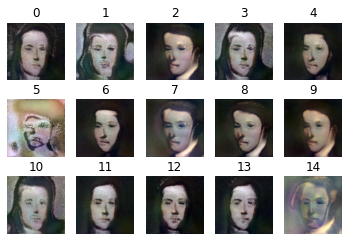

In [9]:
for i in range(15):
  img_u8 = np.uint8(np.clip(imgs[i], 0.0, 1.0) * 255)
  plt.subplot(3, 5, i+1)
  plt.title(i)
  plt.imshow(img_u8)
  plt.axis('off')

Let's morph one image to another one

In [10]:
imgs = model.generate_image_seq(img_style, img_noise, 1, 6, n_imgs=15)

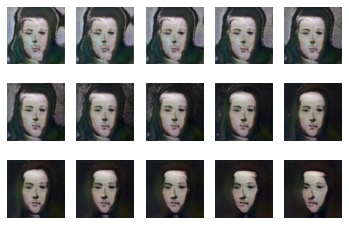

In [11]:
for i in range(15):
  img_u8 = np.uint8(np.clip(imgs[i], 0.0, 1.0) * 255)
  plt.subplot(3, 5, i+1)
  plt.imshow(img_u8)
  plt.axis('off')